In [4]:
### conexiones
import sys
sys.path.insert(0, "/home/jupyter")

%time
import ciphered_connections as connections
import getpass
from datetime import datetime

# path = getpass.getpass("PATH: ")
# key = getpass.getpass("KEY:  ")
# iv = getpass.getpass("IV:   ")

path = "/home/jupyter/ciphered_connections/000543781.dta"
key = "50bb801fa81378a538654b2b7076b223"
iv = "9029080389AF47F5"

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.72 µs


In [5]:
# path: /home/jupyter/ciphered_connections/000543781.dta  
# key: 50bb801fa81378a538654b2b7076b223
# iv: 9029080389AF47F5

%time

conexion_bq = connections.BigQueryConnection(
    path_token = path, key = key, 
    iv = iv)
datetime_str = datetime.now().strftime("%Y%m%d%H%M%S")
table = "DATAMART.gcs_tabla_tiger_{0}".format(datetime_str)
bucket_object = "gcs_file_tiger_{0}_*.csv".format(datetime_str)
bucket_name = 'nbamasmovil'

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


In [6]:
# Descarga de tablón
query_decil = '''
    SELECT *                                  
    FROM  `bi-data-science-pilots.DESARROLLO.000_ajuste_18_202008` #TABLON_1P_SEG_Comp_TRES_202006`
    where Decil < 3
        '''
TABLON_decil = conexion_bq.download_table_bq_gcs(query_decil,
    tabla_tmp = table, bucket_name = bucket_name,
    tmp_object = bucket_object)

TABLON_decil

Query results loaded to table /projects/bi-data-science-pilots/datasets/DATAMART/tables/gcs_tabla_tiger_20201125094519
Exported DATAMART.gcs_tabla_tiger_20201125094519 to gs://nbamasmovil/gcs_file_tiger_20201125094519_*.csv
Ejecutando la query:
 drop table `bi-data-science-pilots.DATAMART.gcs_tabla_tiger_20201125094519` ...

Query ejecutada correctamente


YEAR  MONTH     EOP BRAND_DS  CUSTOMER_ID MIN_SERV_ACTIVATION_DATE  \
0      2020      8  202008    YOIGO       846284               2009-01-27   
1      2020      8  202008    YOIGO      1375040               2009-09-18   
2      2020      8  202008    YOIGO      4091530               2012-04-25   
3      2020      8  202008    YOIGO       284597               2007-12-16   
4      2020      8  202008    YOIGO      1785919               2010-03-04   
...     ...    ...     ...      ...          ...                      ...   
53677  2020      8  202008    YOIGO       913616               2013-07-26   
53678  2020      8  202008    YOIGO      3774297               2012-01-10   
53679  2020      8  202008    YOIGO      4671799               2012-10-30   
53680  2020      8  202008    YOIGO       610608               2008-09-13   
53681  2020      8  202008    YOIGO        79639               2007-03-20   

      MAX_SERV_DEACTIVATION_DATE  NUM_ACCS_TOTA  NUM_ACCS_ACTI  NUM_ACCS_DEAC  \
0                     2020-03-01              7              0              0   
1                     2018-01-16             11              0              0   
2                     2019-12-26              7              0              0   
3                     2019-10-10              3              0              0   
4                     2020-03-17              6              0              0   
...                          ...            ...            ...            ...   
53677                 2019-08-31              3              0              0   
53678                 2019-01-25              5              0              0   
53679                 2018-12-21              8              0              0   
53680                 2019-11-21             11              0              0   
53681                 2020-08-11             13              0              1   

       ...  FACTURACION_MEDIA_USO  FACTURACION_USO  INCR_PORCENTUAL_USO  \
0      ...              18.820000            17.35            -0.078108   
1      ...              15.700000            15.70             0.000000   
2      ...              29.086667            29.12             0.001146   
3      ...              26.450000            26.45             0.000000   
4      ...              11.570000            11.67             0.008643   
...    ...                    ...              ...                  ...   
53677  ...              32.330000            32.23            -0.003093   
53678  ...              21.570000            22.16             0.027353   
53679  ...              26.450000            27.54             0.041210   
53680  ...              11.603333            11.57            -0.002873   
53681  ...              17.906667            21.49             0.200112   

       VARIACION_ABSOLUTA_USO  SEG_proceso  SEG_Calidad  SEG_Heavy_Callers  \
0                   -1.470000            0            0                  0   
1                    0.000000            0            0                  0   
2                    0.033333            0            0                  0   
3                    0.000000            0            0                  0   
4                    0.100000            0            0                  0   
...                       ...          ...          ...                ...   
53677               -0.100000            0            0                  0   
53678                0.590000            0            0                  0   
53679                1.090000            0            0                  0   
53680               -0.033333            0            0                  0   
53681                3.583333            0            0                  0   

       SEG_Wrong_Tariff  SEG_Competitors  SEGMENTO_CHURN_1P  
0                     1                1     4_WRONG TARIFF  
1                     0                1      6_COMPETITORS  
2                     1                1     4_WRONG TARIFF  
3                     0

In [7]:
df=TABLON_decil.copy()

In [ ]:
DESDE 

In [66]:
# tratamiento de valores ausentes 

# Imputación de valores perdidos sobre el tablon con todos los registros

df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
df.isnull().values.any()

False

##### BLOQUE 3 WRONG TARIFF


<ol>
<li> INC_PORC>0 OR   ¿? </li>  
<li> LINEAS_TARIFA_ERRONEA>0  ok</li> 
<li> FIN_DTO>0 or     </li>
<li> NUM_LLAMADAS_WRONG_TARIFF>0  ok  </li> si

nota en este proceso se hace uso de la tabla bi-data-science-pilots.DESARROLLO.TABLON_1P_SEG_Comp_202006 la cual no tenemos detalle de su generacion
</ol>

In [67]:
import pandas as pd
import numpy as np

In [68]:
# Se define la condicion para la variable LINEAS_TARIFA_ERRONEA
#==============================
# condicion
conditions = [(df['Lineas_Con_Consumo_Pdte'] >= 2  )  | (df['Lineas_Exceso'] >= 1 ) | (df['Lineas_Con_Bono_Sin_Uso']>=1) ]
# valores
values = [1]
#aplicacion
df['LINEAS_TARIFA_ERRONEA'] = np.select(conditions, values)

#### Depuración de tabla

In [69]:
import AYD
cadena=AYD.DS.DSC_Factor(df)
cadena_constantes = cadena[cadena.unique==1]           
eliminar_constantes=list(cadena_constantes['Variables'])

# Se añade a la lista variables de consentimiento
# ===================================================
eliminar_constantes.extend(['CONSENTSTATUSDETAIL','CONSENTSTATUSNAME','CONSENT_STATUS_DS','CONSENT_STATUS_DETAIL'] ) # variables gdpr 
eliminar_constantes.extend(['CUST_PREP_SEGMENT','MAIN_BRAND'] ) # variables desconocida
eliminar_constantes.extend(['CRM_WORK_TYPE'] ) # WORK TYPE, tenemos que recodificar bien
eliminar_constantes

['BRAND_DS',
 'CUST_BILL_POST_SEGMENT_CURR',
 'CUST_BUNDLE_CURR',
 'Bundle_Type',
 'Fecha_Predicion',
 'Modelo',
 'CONSENTSTATUSDETAIL',
 'CONSENTSTATUSNAME',
 'CONSENT_STATUS_DS',
 'CONSENT_STATUS_DETAIL',
 'CUST_PREP_SEGMENT',
 'MAIN_BRAND',
 'CRM_WORK_TYPE']

In [70]:
#verificar('BRAND_DS')

In [71]:
cadena=AYD.DS.DSC_Factor(df)
cadena.head()

Variables    TIPO   count  nº_NA Pcte_NA unique  \
0                     BRAND_DS  Factor  191059      0       0      1   
1     MIN_SERV_ACTIVATION_DATE  Factor  191059      0       0   4555   
2   MAX_SERV_DEACTIVATION_DATE  Factor  191059      0       0   3638   
3  CUST_BILL_PREP_SEGMENT_CURR  Factor  191059      0       0      3   
4  CUST_BILL_POST_SEGMENT_CURR  Factor  191059      0       0      1   

          top    freq  
0       YOIGO  191059  
1  2014-02-03     521  
2           .  118489  
3           .  183201  
4        RESI  191059

In [72]:
# Se identifican variables constantes
# ===================================================
cadena_constantes = cadena[cadena.unique==1]       
eliminar_constantes=list(cadena_constantes['Variables'])

# Se añade a la lista variables de consentimiento
# ===================================================
# eliminar_constantes.extend(['CONSENTSTATUSDETAIL','CONSENTSTATUSNAME','CONSENT_STATUS_DS','CONSENT_STATUS_DETAIL'] ) # variables gdpr 
# eliminar_constantes.extend(['CUST_PREP_SEGMENT','MAIN_BRAND'] ) # variables desconocida
eliminar_constantes.extend(['CRM_WORK_TYPE'] ) # WORK TYPE, tenemos que recodificar bien
eliminar_constantes




['BRAND_DS',
 'CUST_BILL_POST_SEGMENT_CURR',
 'CUST_BUNDLE_CURR',
 'Bundle_Type',
 'Fecha_Predicion',
 'Modelo',
 'CRM_WORK_TYPE']

In [73]:

# Se eliminan las varibales seleccionadas
# ========================================
df.drop(eliminar_constantes, axis = 'columns',inplace=True) 
df

YEAR  MONTH     EOP  CUSTOMER_ID MIN_SERV_ACTIVATION_DATE  \
0      2020      6  202006      6783242               2015-09-02   
1      2020      6  202006      8143942               2017-12-28   
2      2020      6  202006      6647336               2015-04-06   
3      2020      6  202006       668484               2008-10-25   
4      2020      6  202006      1038988               2009-04-03   
...     ...    ...     ...          ...                      ...   
63743  2020      6  202006       583934               2008-08-22   
63744  2020      6  202006      3674764               2011-12-15   
63745  2020      6  202006      1740638               2010-02-16   
63746  2020      6  202006      6652857               2015-03-24   
63747  2020      6  202006      1368642               2009-09-16   

      MAX_SERV_DEACTIVATION_DATE  NUM_ACCS_TOTA  NUM_ACCS_ACTI  NUM_ACCS_DEAC  \
0                              .              1              1              1   
1                              .              1              1              1   
2                     2019-07-01              2              1              1   
3                     2013-12-21              2              1              1   
4                     2019-10-15              1              1              1   
...                          ...            ...            ...            ...   
63743                 2020-01-16             19              1              0   
63744                 2020-02-11             56              2              2   
63745                 2018-10-23             94              0              0   
63746                 2018-08-21            129              0              0   
63747                 2020-03-20            218              0              0   

       NUM_ACCS_CURR  ...  VERSION  fuga_real  ISSUE_CALL   GB_EXCESO  \
0                  1  ...        2          0         0.0    0.000000   
1                  1  ...        2          0         2.0 -934.541732   
2                  1  ...        2          0         0.0 -857.351840   
3                  1  ...        2          0         0.0 -927.438525   
4                  2  ...        2          0         0.0 -963.313903   
...              ...  ...      ...        ...         ...         ...   
63743              2  ...        2          0         0.0    0.000000   
63744              7  ...        2          0         0.0    0.000000   
63745             34  ...        2          0         0.0    0.000000   
63746            788  ...        2          0         0.0    0.000000   
63747             61  ...        2          0         0.0    0.000000   

       Lineas_Exceso  Lineas_Poco_Uso  total_telefonos  DISCOUNT_VALUE_eur  \
0                0.0              0.0              4.0              170.00   
1                0.0              0.0              3.0              107.50   
2                0.0              0.0              4.0               77.95   
3                0.0              0.0              3.0               97.95   
4                0.0              0.0              4.0              103.95   
...              ...              ...              ...                 ...   
63743            0.0              0.0              3.0               85.26   
63744            0.0              0.0              4.0               75.90   
63745            0.0              0.0              0.0                0.00   
63746            0.0              0.0            397.0             7940.00   
63747            0.0              0.0              0.0                0.00   

       FIN_DTO  LINEAS_TARIFA_ERRONEA  
0          0.0                      0  
1          0.0                      0  
2          0.0                      0  
3          0.0                      0  
4          0.0                      0  
...        ...                    ...  
63743      0.0                      0  
63744      0.0                      0  
63745      0.0                      0  
637

In [74]:
# Se eliminan las varibales seleccionadas
# ========================================
df.drop(['CRM_BIRTH_DT',
 'LINE_TYPE_MAIN_PREP_ACT_LAST_DT', 'LINE_TYPE_MAIN_PREP_DEA_LAST_DT',
 'LINE_TYPE_FIXE_POST_ACT_LAST_DT', 'LINE_TYPE_MAIN_POST_ACT_LAST_DT',
 'LINE_TYPE_EXTR_POST_ACT_LAST_DT', 'LINE_TYPE_ADDI_POST_ACT_LAST_DT',
 'LINE_TYPE_FIXE_POST_DEA_LAST_DT', 'LINE_TYPE_MAIN_POST_DEA_LAST_DT',
 'LINE_TYPE_EXTR_POST_DEA_LAST_DT', 'LINE_TYPE_ADDI_POST_DEA_LAST_DT',
 'CUSTOMER_ID'], axis = 'columns',inplace=True) 



numericas=AYD.DS.DSC(df)
numericas.head()


#eliminar todas la variables con la palabra busi y soho
eliminar=list(numericas[numericas['Variables'].str.contains("BUSI|SOHO|FIX|GDPR|FTTH|ADSL|2P|FMC|PRE" ,case=False)]['Variables']) 
eliminar.extend(['EOP','GDPR_NEVER_CALL','MONTH','Propension','YEAR','Percentil','VERSION','Decil'])  # variables gdpr 

df.drop(eliminar, axis = 'columns', inplace=True)
df_num=df
df_num

MIN_SERV_ACTIVATION_DATE MAX_SERV_DEACTIVATION_DATE  NUM_ACCS_TOTA  \
0                   2015-09-02                          .              1   
1                   2017-12-28                          .              1   
2                   2015-04-06                 2019-07-01              2   
3                   2008-10-25                 2013-12-21              2   
4                   2009-04-03                 2019-10-15              1   
...                        ...                        ...            ...   
63743               2008-08-22                 2020-01-16             19   
63744               2011-12-15                 2020-02-11             56   
63745               2010-02-16                 2018-10-23             94   
63746               2015-03-24                 2018-08-21            129   
63747               2009-09-16                 2020-03-20            218   

       NUM_ACCS_ACTI  NUM_ACCS_DEAC  NUM_ACCS_CURR  NUM_BRAND_YOIGO_TOTA  \
0                  1              1              1                     1   
1                  1              1              1                     1   
2                  1              1              1                     2   
3                  1              1              1                     2   
4                  1              1              2                     3   
...              ...            ...            ...                   ...   
63743              1              0              2                    21   
63744              2              2              7                    63   
63745              0              0             34                    94   
63746              0              0            788                   129   
63747              0              0             61                   218   

       NUM_BRAND_YOIGO_ACTI  NUM_BRAND_YOIGO_DEAC  NUM_BRAND_YOIGO_CURR  ...  \
0                         0                     0                     1  ...   
1                         0                     0                     1  ...   
2                         0                     0                     1  ...   
3                         0                     0                     1  ...   
4                         0                     0                     2  ...   
...                     ...                   ...                   ...  ...   
63743                     0                     0                     2  ...   
63744                     0                     0                     8  ...   
63745                     0                     0                    34  ...   
63746                     0                     0                   792  ...   
63747                     0                     0                    61  ...   

       Mobile_Red_Incidences  fuga_real  ISSUE_CALL   GB_EXCESO  \
0                        0.0          0         0.0    0.000000   
1                        0.0          0         2.0 -934.541732   
2                        0.0          0         0.0 -857.351840   
3                        0.0          0         0.0 -927.438525   
4                        0.0          0         0.0 -963.313903   
...                      ...        ...         ...         ...   
63743                    0.0          0         0.0    0.000000   
63744                    0.0          0         0.0    0.000000   
63745                    0.0          0         0.0    0.000000   
63746                    0.0          0         0.0    0.000000   
63747                    0.0          0         0.0    0.000000   

       Lineas_Exceso  Lineas_Poco_Uso  total_telefonos  DISCOUNT_VALUE_eur  \
0                0.0              0.0              4.0              170.00   
1                0.0              0.0              3.0              107.50   
2                0.0              0.0              4.0               77.95   
3                0.0              0.0              3.0               97.95   
4                0.0    

#### Comprobamos existencia de variables concretas

In [75]:

def verificar(var):
    variables_TOTAL=pd.DataFrame(list(df.columns.values)) 
    variables_TOTAL[['Variables']]=variables_TOTAL[[0]]
    validar=list(variables_TOTAL[variables_TOTAL['Variables'].str.contains(var,case=False)]['Variables']) 
    return validar

verificar("NUM_LLAMADAS_WRONG_TARIF")   

['NUM_LLAMADAS_WRONG_TARIFF']

In [76]:
# Se define correlacion entre variables partiendo de una muestra.
# definimos una pequeña muestra
# ===============================================
DF_muestra=df.head(10000)
#DF_COR=df
DF_muestra

MIN_SERV_ACTIVATION_DATE MAX_SERV_DEACTIVATION_DATE  NUM_ACCS_TOTA  \
0                  2015-09-02                          .              1   
1                  2017-12-28                          .              1   
2                  2015-04-06                 2019-07-01              2   
3                  2008-10-25                 2013-12-21              2   
4                  2009-04-03                 2019-10-15              1   
...                       ...                        ...            ...   
9995               2016-09-01                          .              1   
9996               2018-08-06                          .              0   
9997               2012-08-06                          .              1   
9998               2018-11-12                          .              1   
9999               2011-05-03                          .              1   

      NUM_ACCS_ACTI  NUM_ACCS_DEAC  NUM_ACCS_CURR  NUM_BRAND_YOIGO_TOTA  \
0                 1              1              1                     1   
1                 1              1              1                     1   
2                 1              1              1                     2   
3                 1              1              1                     2   
4                 1              1              2                     3   
...             ...            ...            ...                   ...   
9995              0              0              1                     1   
9996              0              0              1                     0   
9997              1              0              1                     1   
9998              0              0              1                     1   
9999              0              0              1                     1   

      NUM_BRAND_YOIGO_ACTI  NUM_BRAND_YOIGO_DEAC  NUM_BRAND_YOIGO_CURR  ...  \
0                        0                     0                     1  ...   
1                        0                     0                     1  ...   
2                        0                     0                     1  ...   
3                        0                     0                     1  ...   
4                        0                     0                     2  ...   
...                    ...                   ...                   ...  ...   
9995                     0                     0                     1  ...   
9996                     0                     0                     1  ...   
9997                     0                     0                     1  ...   
9998                     0                     0                     1  ...   
9999                     0                     0                     1  ...   

      Mobile_Red_Incidences  fuga_real  ISSUE_CALL   GB_EXCESO  Lineas_Exceso  \
0                       0.0          0         0.0    0.000000            0.0   
1                       0.0          0         2.0 -934.541732            0.0   
2                       0.0          0         0.0 -857.351840            0.0   
3                       0.0          0         0.0 -927.438525            0.0   
4                       0.0          0         0.0 -963.313903            0.0   
...                     ...        ...         ...         ...            ...   
9995                    0.0          0         0.0    0.000000            0.0   
9996                    0.0          0         0.0   -6.573836            0.0   
9997                    0.0          0         0.0    0.000000            0.0   
9998                    0.0          0         0.0   -2.399977            0.0   
9999                    0.0          0         0.0   -6.909315            0.0   

      Lineas_Poco_Uso  total_telefonos  DISCOUNT_VALUE_eur  FIN_DTO  \
0                 0.0              4.0              170.00      0.0   
1                 0.0              3.0              107.50      0.0   
2                 0.0              4.0               77.95      0.0 

In [77]:
DF_muestra.isnull().values.any()

False

In [78]:
# listamso por definicion las variables mas relacionadas con este segmento

tablon_issue = DF_muestra.loc[:, (  
            'LINEAS_TARIFA_ERRONEA',
            'FIN_DTO',
             'NUM_LLAMADAS_WRONG_TARIFF',   
             'fuga_real')]

# ===============================================
corr = tablon_issue.corr()
cor_var= corr[['fuga_real']].sort_values(by = 'fuga_real',ascending = False)
cor_var


fuga_real
fuga_real                   1.000000
NUM_LLAMADAS_WRONG_TARIFF   0.017712
LINEAS_TARIFA_ERRONEA       0.016402
FIN_DTO                     0.007561

### lista 1

In [79]:
# Correlacion con FIN_DTO
# ===============================================
# DF_COR -->  df
corr = DF_muestra.corr()
cor_var= corr[['LINEAS_TARIFA_ERRONEA']].sort_values(by = 'LINEAS_TARIFA_ERRONEA',ascending = False)
cor_var

# \
# .style.background_gradient()
SEG_PROCESS_Wrong= cor_var[cor_var['LINEAS_TARIFA_ERRONEA']>=0.2]

SEG_PROCESS_Wrong_T_lista_1=list(SEG_PROCESS_Wrong.T)
SEG_PROCESS_Wrong_T_lista_1

['LINEAS_TARIFA_ERRONEA',
 'flag_BONO',
 'lineas_BONO_PAGADO',
 'FLAG_useless_line',
 'LM3_LINEAS_BONO_PAGADO',
 'LM2_LINEAS_BONO_PAGADO',
 'Lineas_Exceso',
 'Lineas_Con_Bono_Sin_Uso',
 'lineas_GB_Exceso',
 'lineas_1GB_Exceso',
 'LM2_LINEAS_GB_EXCESO',
 'EUR_BONO_PAGADO_C',
 'Fact_BONO',
 'total_amount_wo_tax_data',
 'MoONLY_am_wotax_data',
 'lineas_gb_exceso_m1',
 'LM3_LINEAS_GB_EXCESO',
 'lineas_gb_exceso_m2',
 'kpi_tax',
 'Fact_Total_tax']

### lista 2

In [80]:
cor_var= corr[['FIN_DTO']].sort_values(by = 'FIN_DTO',ascending = False)
SEG_PROCESS_Wrong= cor_var[cor_var['FIN_DTO']>=0.6]
SEG_PROCESS_Wrong_T_lista_2=list(SEG_PROCESS_Wrong.T)
SEG_PROCESS_Wrong_T_lista_2

['FIN_DTO']

### lista 3

In [81]:
cor_var= corr[['NUM_LLAMADAS_WRONG_TARIFF']].sort_values(by = 'NUM_LLAMADAS_WRONG_TARIFF',ascending = False)
SEG_PROCESS_Wrong= cor_var[cor_var['NUM_LLAMADAS_WRONG_TARIFF']>=0.27]
SEG_PROCESS_Wrong_T_lista_3=list(SEG_PROCESS_Wrong.T)
SEG_PROCESS_Wrong_T_lista_3

['NUM_LLAMADAS_WRONG_TARIFF',
 'IVR_NUM_YDILO',
 'IVR_NUM_SEGM',
 'IVR_NUM_RECA',
 'IVR_NUM_SAME_ORIGIN',
 'IVR_IS_AFTE',
 'IVR_NUM_MDTEL',
 'IVR_NUM_CALL_IN',
 'IVR_NUM_CALLS',
 'MOSAIC_NUM_COMM_DEPT_ATC_CURR',
 'MOSAIC_NUM_COMM_WP_GRP_NO_ISSUE_CURR',
 'MOSAIC_NUM_COMM_WP_NO_ISSUE_CURR',
 'MOSAIC_NUM_COMM_WP_GRP_UNKN_CURR',
 'MOSAIC_NUM_COMMS_CURR',
 'MAX_IVR_NUM_SEGM',
 'IVR_NUM_THUR',
 'IVR_NUM_SECS_TOTAL',
 'MAX_IVR_NUM_SECS_TOTAL',
 'MOSAIC_NUM_COMM_WITHOUT_ISSUE_CURR',
 'IVR_DIFF_CUST_PHONE_NM',
 'NUM_LLAMADAS_PROCESS',
 'NUM_LLAMADAS_HEAVY_CALLERS',
 'AVG_IVR_NUM_SEGM',
 'IVR_NUM_CALL_TRAN',
 'IVR_NUM_RECA_AGEN',
 'IVR_NUM_TUES']

In [82]:
SEG_PROCESS_Wrong_T_lista_1.extend(SEG_PROCESS_Wrong_T_lista_2)
SEG_PROCESS_Wrong_T_lista_1.extend(SEG_PROCESS_Wrong_T_lista_3)

In [83]:
SEG_PROCESS_Wrong_T_lista_1

['LINEAS_TARIFA_ERRONEA',
 'flag_BONO',
 'lineas_BONO_PAGADO',
 'FLAG_useless_line',
 'LM3_LINEAS_BONO_PAGADO',
 'LM2_LINEAS_BONO_PAGADO',
 'Lineas_Exceso',
 'Lineas_Con_Bono_Sin_Uso',
 'lineas_GB_Exceso',
 'lineas_1GB_Exceso',
 'LM2_LINEAS_GB_EXCESO',
 'EUR_BONO_PAGADO_C',
 'Fact_BONO',
 'total_amount_wo_tax_data',
 'MoONLY_am_wotax_data',
 'lineas_gb_exceso_m1',
 'LM3_LINEAS_GB_EXCESO',
 'lineas_gb_exceso_m2',
 'kpi_tax',
 'Fact_Total_tax',
 'FIN_DTO',
 'NUM_LLAMADAS_WRONG_TARIFF',
 'IVR_NUM_YDILO',
 'IVR_NUM_SEGM',
 'IVR_NUM_RECA',
 'IVR_NUM_SAME_ORIGIN',
 'IVR_IS_AFTE',
 'IVR_NUM_MDTEL',
 'IVR_NUM_CALL_IN',
 'IVR_NUM_CALLS',
 'MOSAIC_NUM_COMM_DEPT_ATC_CURR',
 'MOSAIC_NUM_COMM_WP_GRP_NO_ISSUE_CURR',
 'MOSAIC_NUM_COMM_WP_NO_ISSUE_CURR',
 'MOSAIC_NUM_COMM_WP_GRP_UNKN_CURR',
 'MOSAIC_NUM_COMMS_CURR',
 'MAX_IVR_NUM_SEGM',
 'IVR_NUM_THUR',
 'IVR_NUM_SECS_TOTAL',
 'MAX_IVR_NUM_SECS_TOTAL',
 'MOSAIC_NUM_COMM_WITHOUT_ISSUE_CURR',
 'IVR_DIFF_CUST_PHONE_NM',
 'NUM_LLAMADAS_PROCESS',
 'NUM_LLA

In [84]:
SEG_PROCESS_Wrong_T_lista_1.extend(['fuga_real'])
SEG_PROCESS_Wrong_T_lista_1

['LINEAS_TARIFA_ERRONEA',
 'flag_BONO',
 'lineas_BONO_PAGADO',
 'FLAG_useless_line',
 'LM3_LINEAS_BONO_PAGADO',
 'LM2_LINEAS_BONO_PAGADO',
 'Lineas_Exceso',
 'Lineas_Con_Bono_Sin_Uso',
 'lineas_GB_Exceso',
 'lineas_1GB_Exceso',
 'LM2_LINEAS_GB_EXCESO',
 'EUR_BONO_PAGADO_C',
 'Fact_BONO',
 'total_amount_wo_tax_data',
 'MoONLY_am_wotax_data',
 'lineas_gb_exceso_m1',
 'LM3_LINEAS_GB_EXCESO',
 'lineas_gb_exceso_m2',
 'kpi_tax',
 'Fact_Total_tax',
 'FIN_DTO',
 'NUM_LLAMADAS_WRONG_TARIFF',
 'IVR_NUM_YDILO',
 'IVR_NUM_SEGM',
 'IVR_NUM_RECA',
 'IVR_NUM_SAME_ORIGIN',
 'IVR_IS_AFTE',
 'IVR_NUM_MDTEL',
 'IVR_NUM_CALL_IN',
 'IVR_NUM_CALLS',
 'MOSAIC_NUM_COMM_DEPT_ATC_CURR',
 'MOSAIC_NUM_COMM_WP_GRP_NO_ISSUE_CURR',
 'MOSAIC_NUM_COMM_WP_NO_ISSUE_CURR',
 'MOSAIC_NUM_COMM_WP_GRP_UNKN_CURR',
 'MOSAIC_NUM_COMMS_CURR',
 'MAX_IVR_NUM_SEGM',
 'IVR_NUM_THUR',
 'IVR_NUM_SECS_TOTAL',
 'MAX_IVR_NUM_SECS_TOTAL',
 'MOSAIC_NUM_COMM_WITHOUT_ISSUE_CURR',
 'IVR_DIFF_CUST_PHONE_NM',
 'NUM_LLAMADAS_PROCESS',
 'NUM_LLA

In [85]:
tablon_filtrado_ML=DF_muestra.loc[:,list(SEG_PROCESS_Wrong_T_lista_1)]
tablon_filtrado_ML

LINEAS_TARIFA_ERRONEA  flag_BONO  lineas_BONO_PAGADO  FLAG_useless_line  \
0                         0        0.0                   0                0.0   
1                         0        0.0                   0                0.0   
2                         0        0.0                   0                0.0   
3                         0        0.0                   0                0.0   
4                         0        0.0                   0                0.0   
...                     ...        ...                 ...                ...   
9995                      0        0.0                   0                0.0   
9996                      0        0.0                   0                0.0   
9997                      0        0.0                   0                0.0   
9998                      1        1.0                   1                1.0   
9999                      0        0.0                   0                0.0   

      LM3_LINEAS_BONO_PAGADO  LM2_LINEAS_BONO_PAGADO  Lineas_Exceso  \
0                          0                       0            0.0   
1                          0                       0            0.0   
2                          0                       0            0.0   
3                          0                       0            0.0   
4                          0                       0            0.0   
...                      ...                     ...            ...   
9995                       0                       0            0.0   
9996                       0                       0            0.0   
9997                       0                       0            0.0   
9998                       1                       1            0.0   
9999                       0                       0            0.0   

      Lineas_Con_Bono_Sin_Uso  lineas_GB_Exceso  lineas_1GB_Exceso  ...  \
0                           0                 1                  1  ...   
1                           0                 0                  0  ...   
2                           0                 0                  0  ...   
3                           0                 0                  0  ...   
4                           0                 0                  0  ...   
...                       ...               ...                ...  ...   
9995                        0                 0                  0  ...   
9996                        0                 0                  0  ...   
9997                        0                 0                  0  ...   
9998                        1                 0                  0  ...   
9999                        0                 0                  0  ...   

      MAX_IVR_NUM_SECS_TOTAL  MOSAIC_NUM_COMM_WITHOUT_ISSUE_CURR  \
0                        555                                   0   
1                        803                                   1   
2                          0                                   0   
3                          0                                   0   
4                        981                                   1   
...                      ...                                 ...   
9995                       0                                   0   
9996                     120                                   0   
9997                       0                                   0   
9998                       0                                   0   
9999                       0                                   0   

      IVR_DIFF_CUST_PHONE_NM  NUM_LLAMADAS_PROCESS  \
0                          1                     1   
1                          1                     0   
2                          0                     0   
3                          0                     0   
4                          1                     0   
...                      ...                   ...   
9995                       0                     0   
9996                       1  

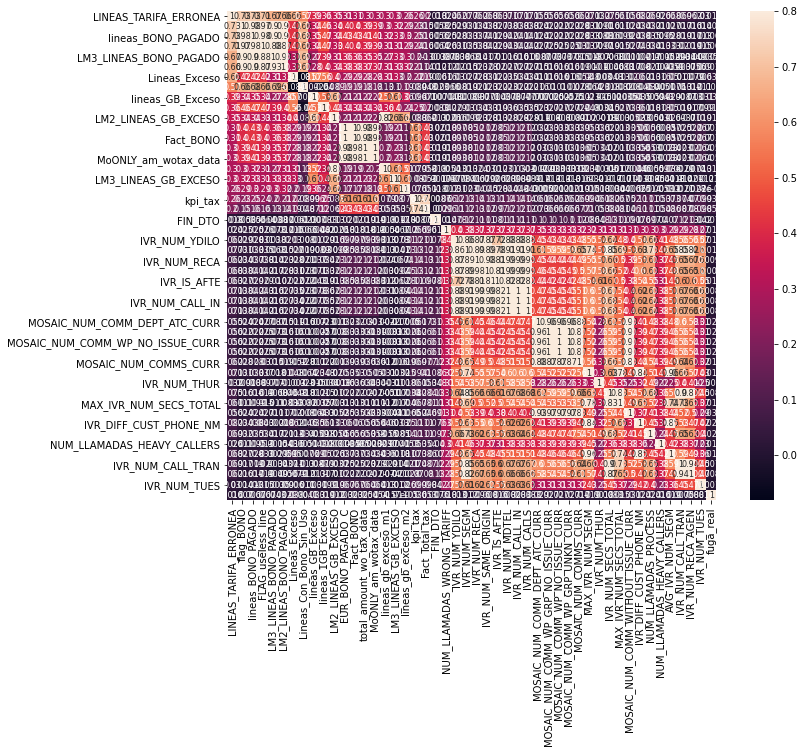

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt  
corrmat = tablon_filtrado_ML.corr() #df_corelacion.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot = True, annot_kws = {'size': 8});

#### regla 1

In [87]:
X=df[[
'LINEAS_TARIFA_ERRONEA',
 'Lineas_Exceso',
 'lineas_BONO_PAGADO',
 'flag_BONO',
#  'LM2_LINEAS_BONO_PAGADO',
#  'LM3_LINEAS_BONO_PAGADO',
 'FLAG_useless_line',
 'Lineas_Con_Bono_Sin_Uso',
 'lineas_GB_Exceso',
#  'LM2_LINEAS_GB_EXCESO',
 'ISSUE_CALL',
 'lineas_1GB_Exceso',
#  MIRAR 'lineas_gb_exceso_m1',
 ### --> 'EUR_BONO_PAGADO_C',
 'Fact_BONO',
#  'total_amount_wo_tax_data',
 ### --> 'MoONLY_am_wotax_data',
#  'LM3_LINEAS_GB_EXCESO',
# MIRAR  'lineas_gb_exceso_m2',
#  'kpi_tax',
# 'Fact_Total_tax',
#  'Fact_Total_Wotax',
 'total_jiras_cc',
 'lineas_5GB_Exceso',
 'FIN_DTO',
#  'NUM_DISC_NEXT_2_MONTHS_DEAC',
#  'NUM_DISC_PURE_NEXT_2_MONTHS_DEAC',
#  'NUM_SELL_TYPE_NEWS_ACTI',
#  'NUM_LINE_TYPE_MAIN_POST_ACTI',
#  'NUM_SELL_TYPE_TECH_MOBI_ACTI',
#  'NUM_SELL_TYPE_ACTI',
 'NUM_LLAMADAS_WRONG_TARIFF',
 'ISSUE_CALL',
# 'IVR_NUM_HOUR_16',
#  'MAX_IVR_NUM_SEGM',
 'MOSAIC_NUM_COMM_DEPT_FAULT_CURR',
#  'total_jiras_cc',
#  'IVR_NUM_YDILO',  ## mirar
 'NUM_SERV_AGILETV_PLUS_CURR',
 'NUM_SERV_AGILETV_CURR',
# 'MIN_LLAMADAS_JAZZTEL_IN',
#  'MAX_IVR_NUM_SECS_TOTAL',
 'MOSAIC_NUM_COMM_DEPT_ATC_CURR'
# , 'MOSAIC_NUM_COMMS_CURR' #,
#  'NUM_DAYS_MAX_DEBT_DEACTIVATION_DATE'
]]


Y=df[['fuga_real']].astype(str)


# Realizamos el train test split
# ======================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

n = len(X)
print("Total de registros en el DF original: {}".format(n))
print("Porcentaje en  train respecto al original: {}".format(1.0 * len(X_train) / n))
print("Porcentaje en  test respecto al original: {}".format(1.0 * len(X_test) / n))



from sklearn.tree import DecisionTreeClassifier
import numpy as np


# Indice de gini para arbol de decisión
# ======================================================
clf_gini = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=1500) 

#clf=clf_entropy.fit(X_train, Y_train)
clf=clf_gini.fit(X_train, Y_train)


np.unique(Y_train) # valores target deben de ser tipo caracter


import graphviz 
from sklearn import tree
import graphviz 
from sklearn import tree


dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,  proportion = True,
                         special_characters=True)




Total de registros en el DF original: 191059
Porcentaje en  train respecto al original: 0.7999989532029373
Porcentaje en  test respecto al original: 0.20000104679706268


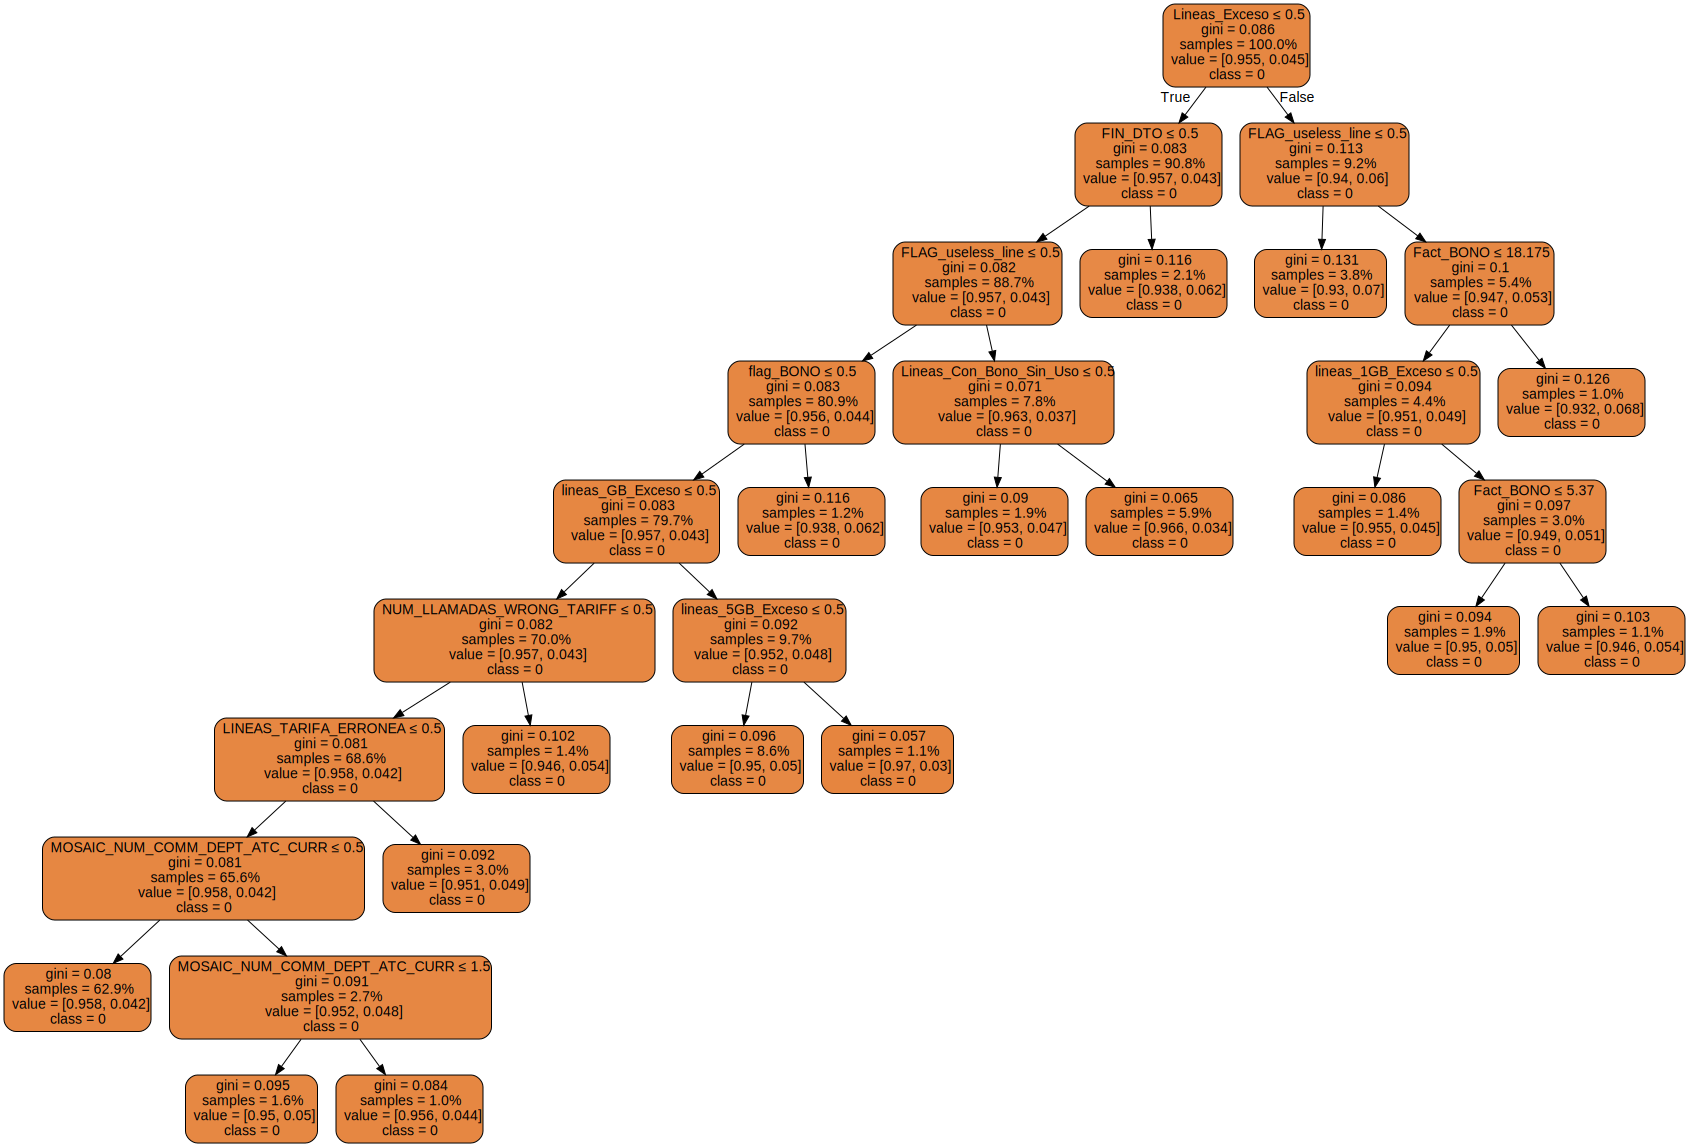

In [88]:
graph = graphviz.Source(dot_data)  
# #Para exportarlo a pdf graph.render("Arbol")
graph


In [ ]:
DESDE

In [ ]:
# import pydotplus
# dot_data = tree.export_graphviz(clf, out_file = None,
#                                 feature_names = X_train.columns,
#                                 class_names = np.unique(Y_train),
#                                 filled=True,  rounded=True,  
#                          special_characters=True)

# pydot_graph = pydotplus.graph_from_dot_data(dot_data)
# # pydot_graph.write_png('original_tree.png')
# pydot_graph.set_size('"8,8!"')
# pydot_graph.write_png('02_SEG_Wrong_tarrif.png')

In [ ]:
# FIN DE SEGMENTACION 

In [ ]:
#INICIO DE GENOMA

In [ ]:
df_prueba=tablon_filtrado_ML.iloc[:,0:6]
df_prueba

In [208]:
df_prueba.dtypes

LINEAS_TARIFA_ERRONEA        int64
lineas_BONO_PAGADO           int64
flag_BONO                  float64
LM2_LINEAS_BONO_PAGADO       int64
LM3_LINEAS_BONO_PAGADO       int64
Lineas_Con_Bono_Sin_Uso      int64
dtype: object

In [209]:
df=df_prueba

In [210]:
df

LINEAS_TARIFA_ERRONEA  lineas_BONO_PAGADO  flag_BONO  \
0                         0                   0        0.0   
1                         1                   0        0.0   
2                         0                   0        0.0   
3                         0                   0        0.0   
4                         0                   0        0.0   
...                     ...                 ...        ...   
2995                      0                   0        0.0   
2996                      1                   1        1.0   
2997                      0                   0        0.0   
2998                      0                   0        0.0   
2999                      0                   0        0.0   

      LM2_LINEAS_BONO_PAGADO  LM3_LINEAS_BONO_PAGADO  Lineas_Con_Bono_Sin_Uso  
0                          0                       0                        0  
1                          0                       0                        0  
2                          0                       0                        0  
3                          0                       0                        0  
4                          0                       0                        0  
...                      ...                     ...                      ...  
2995                       0                       0                        0  
2996                       1                       1                        1  
2997                       0                       0                        0  
2998                       0                       0                        0  
2999                       0                       0                        0  

[3000 rows x 6 columns]

In [ ]:
1º mirar si todas las variables son numericas
2º meter en funcion restructur
3º probar grafico

In [ ]:
#inicio de prueba para wrong tariff

In [211]:
from itertools import permutations
import itertools 

import operator
from functools import reduce


In [212]:
def restructur(df):
        # ponemos todas las variables a binario, y donde vale 1 poner el nombre de la variable
        # ==========================
        for i in df:
            conditions = [(df[i] !=  0 )]
            values = [1]
            # aplicaciones
            df[i] = np.select(conditions, values)
            # reemplazamos valores por nombre de variables
            df[i] = df[i].replace([1],i)
            df    

        # Combinaciones del data frame a lista
        # ==========================
        df['combinacion'] = df.values.tolist()

        # Combinaciones
        # ==========================
        columnas=df.shape[1]-1  # todas las variables menos la ultima
        lista=df.iloc[0,columnas]
        list(itertools.combinations(lista, 2))

        combinaciones=[]
        for x in range(df.shape[0]):
            combinaciones.append(list(itertools.combinations(df.iloc[x,columnas], 2)))
        # combinaciones


        # Se sacan todas las combinaciones a pares de cada celda
        # ==========================
        m= reduce(operator.concat,combinaciones)
        # pasamos el objeto a DataFrame renombramos 
        df = pd.DataFrame(m) 
        df['A']=df.iloc[:,0]
        df['B']=df.iloc[:,1]
        df=df.iloc[:,2:]

        # Agrupamos valores sacamos resultados
        # ==========================
        df_agrupado=df.groupby(["A", "B"])["A"].count()

        # depuramos valores de indice para que no queden vacioas
        # ==========================
        df_group=pd.DataFrame(df_agrupado).stack().reset_index()
        df_group=df_group.drop(['level_2'], axis=1)
        return df_group


In [1]:
genoma_wt=restructur(df_prueba)
genoma_wt

NameError: name 'restructur' is not defined

In [226]:
genoma_wt.replace(0, 'a', inplace=True)

In [227]:
genoma_wt

A                        B      0
0                         a                        a  39857
1                         a   LM2_LINEAS_BONO_PAGADO     46
2                         a   LM3_LINEAS_BONO_PAGADO     15
3                         a  Lineas_Con_Bono_Sin_Uso      9
4                         a              combinacion  16240
5                         a                flag_BONO     24
6                         a       lineas_BONO_PAGADO     20
7     LINEAS_TARIFA_ERRONEA                        a   1063
8     LINEAS_TARIFA_ERRONEA   LM2_LINEAS_BONO_PAGADO    249
9     LINEAS_TARIFA_ERRONEA   LM3_LINEAS_BONO_PAGADO    238
10    LINEAS_TARIFA_ERRONEA  Lineas_Con_Bono_Sin_Uso    221
11    LINEAS_TARIFA_ERRONEA              combinacion    457
12    LINEAS_TARIFA_ERRONEA                flag_BONO    257
13    LINEAS_TARIFA_ERRONEA       lineas_BONO_PAGADO    257
14   LM2_LINEAS_BONO_PAGADO                        a     75
15   LM2_LINEAS_BONO_PAGADO   LM3_LINEAS_BONO_PAGADO    253
16   LM2_LINEAS_BONO_PAGADO  Lineas_Con_Bono_Sin_Uso    218
17   LM2_LINEAS_BONO_PAGADO              combinacion    273
18   LM3_LINEAS_BONO_PAGADO                        a     38
19   LM3_LINEAS_BONO_PAGADO  Lineas_Con_Bono_Sin_Uso    215
20   LM3_LINEAS_BONO_PAGADO              combinacion    253
21  Lineas_Con_Bono_Sin_Uso              combinacion    221
22                flag_BONO                        a    101
23                flag_BONO   LM2_LINEAS_BONO_PAGADO    262
24                flag_BONO   LM3_LINEAS_BONO_PAGADO    253
25                flag_BONO  Lineas_Con_Bono_Sin_Uso    221
26                flag_BONO              combinacion    279
27       lineas_BONO_PAGADO                        a     95
28       lineas_BONO_PAGADO   LM2_LINEAS_BONO_PAGADO    262
29       lineas_BONO_PAGADO   LM3_LINEAS_BONO_PAGADO    253
30       lineas_BONO_PAGADO  Lineas_Con_Bono_Sin_Uso    221
31       lineas_BONO_PAGADO              combinacion    277
32       lineas_BONO_PAGADO                flag_BONO    277

In [228]:
genoma_wt['Origen']=genoma_wt.iloc[:,0]
genoma_wt['Destino']=genoma_wt.iloc[:,1]
genoma_wt['count']=genoma_wt.iloc[:,2]
genoma_wt

genoma_wt=genoma_wt.iloc[:,3:]
genoma_wt

Origen                  Destino  count
0                         a                        a  39857
1                         a   LM2_LINEAS_BONO_PAGADO     46
2                         a   LM3_LINEAS_BONO_PAGADO     15
3                         a  Lineas_Con_Bono_Sin_Uso      9
4                         a              combinacion  16240
5                         a                flag_BONO     24
6                         a       lineas_BONO_PAGADO     20
7     LINEAS_TARIFA_ERRONEA                        a   1063
8     LINEAS_TARIFA_ERRONEA   LM2_LINEAS_BONO_PAGADO    249
9     LINEAS_TARIFA_ERRONEA   LM3_LINEAS_BONO_PAGADO    238
10    LINEAS_TARIFA_ERRONEA  Lineas_Con_Bono_Sin_Uso    221
11    LINEAS_TARIFA_ERRONEA              combinacion    457
12    LINEAS_TARIFA_ERRONEA                flag_BONO    257
13    LINEAS_TARIFA_ERRONEA       lineas_BONO_PAGADO    257
14   LM2_LINEAS_BONO_PAGADO                        a     75
15   LM2_LINEAS_BONO_PAGADO   LM3_LINEAS_BONO_PAGADO    253
16   LM2_LINEAS_BONO_PAGADO  Lineas_Con_Bono_Sin_Uso    218
17   LM2_LINEAS_BONO_PAGADO              combinacion    273
18   LM3_LINEAS_BONO_PAGADO                        a     38
19   LM3_LINEAS_BONO_PAGADO  Lineas_Con_Bono_Sin_Uso    215
20   LM3_LINEAS_BONO_PAGADO              combinacion    253
21  Lineas_Con_Bono_Sin_Uso              combinacion    221
22                flag_BONO                        a    101
23                flag_BONO   LM2_LINEAS_BONO_PAGADO    262
24                flag_BONO   LM3_LINEAS_BONO_PAGADO    253
25                flag_BONO  Lineas_Con_Bono_Sin_Uso    221
26                flag_BONO              combinacion    279
27       lineas_BONO_PAGADO                        a     95
28       lineas_BONO_PAGADO   LM2_LINEAS_BONO_PAGADO    262
29       lineas_BONO_PAGADO   LM3_LINEAS_BONO_PAGADO    253
30       lineas_BONO_PAGADO  Lineas_Con_Bono_Sin_Uso    221
31       lineas_BONO_PAGADO              combinacion    277
32       lineas_BONO_PAGADO                flag_BONO    277

In [241]:
# filtrar tabla 

newdf = genoma_wt[(genoma_wt.Origen != "a") & (genoma_wt.Origen != "combinacion") &
                  (genoma_wt.Destino != "a") & (genoma_wt.Destino != "combinacion")
                  
#                   | (genoma_wt.Destino != "a") |
#                  (genoma_wt.Origen != "combinacion") | 
                 ]
newdf

Origen                  Destino  count
8    LINEAS_TARIFA_ERRONEA   LM2_LINEAS_BONO_PAGADO    249
9    LINEAS_TARIFA_ERRONEA   LM3_LINEAS_BONO_PAGADO    238
10   LINEAS_TARIFA_ERRONEA  Lineas_Con_Bono_Sin_Uso    221
12   LINEAS_TARIFA_ERRONEA                flag_BONO    257
13   LINEAS_TARIFA_ERRONEA       lineas_BONO_PAGADO    257
15  LM2_LINEAS_BONO_PAGADO   LM3_LINEAS_BONO_PAGADO    253
16  LM2_LINEAS_BONO_PAGADO  Lineas_Con_Bono_Sin_Uso    218
19  LM3_LINEAS_BONO_PAGADO  Lineas_Con_Bono_Sin_Uso    215
23               flag_BONO   LM2_LINEAS_BONO_PAGADO    262
24               flag_BONO   LM3_LINEAS_BONO_PAGADO    253
25               flag_BONO  Lineas_Con_Bono_Sin_Uso    221
28      lineas_BONO_PAGADO   LM2_LINEAS_BONO_PAGADO    262
29      lineas_BONO_PAGADO   LM3_LINEAS_BONO_PAGADO    253
30      lineas_BONO_PAGADO  Lineas_Con_Bono_Sin_Uso    221
32      lineas_BONO_PAGADO                flag_BONO    277

In [242]:
# se procede a introducir grafico de genoma version 1

In [243]:
# !pip install holoviews

In [244]:
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings("ignore")
pd.set_option("max_columns", 30)

import holoviews as hv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
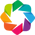

In [245]:
import holoviews as hv
hv.extension('bokeh')

In [248]:
%%opts Chord [height=600 width=600 title="Genoma CHURN Wrong Tariff" ]

chord = hv.Chord(newdf)
print(chord)

:Chord   [Origen,Destino]   (count)


In [249]:
chord

:Chord   [Origen,Destino]   (count)

In [251]:
var = list(set(newdf["Origen"].unique().tolist() + newdf["Destino"].unique().tolist()))
var

['LM3_LINEAS_BONO_PAGADO',
 'LM2_LINEAS_BONO_PAGADO',
 'Lineas_Con_Bono_Sin_Uso',
 'LINEAS_TARIFA_ERRONEA',
 'lineas_BONO_PAGADO',
 'flag_BONO']

In [252]:
var_dataset = hv.Dataset(pd.DataFrame(var, columns=["variables"]))
var_dataset

:Dataset   [variables]

In [255]:
%%opts Chord [height=700 width=700 title="Genoma CHURN Wrong Tariff" labels="var"]

hv.Chord((newdf, var_dataset))

:Chord   [Origen,Destino]   (count)

In [ ]:
%%opts Chord [height=700 width=700 title="Traffic Movement Between Cities" labels="City"]

hv.Chord((flight_counts_bet_cities, cities_dataset))

#### Opcion 1

In [ ]:
# Desde este punto se trabaja con el tablón con todos los registros
df.shape

In [20]:
X=df[[
 'LINEAS_TARIFA_ERRONEA',
 'flag_BONO',
 'Lineas_Con_Bono_Sin_Uso',
 'lineas_BONO_PAGADO',
#  'LM3_LINEAS_BONO_PAGADO',
#  'LM2_LINEAS_BONO_PAGADO',
#  'EUR_BONO_PAGADO_C',
 'Fact_BONO',
#  'NUM_SEGM_RESI_POST_CURR',
#  'NUM_TECH_SPEE_UNKN_POST_CURR',
#  'NUM_TECH_MOBI_POST_CURR',
#  'NUM_LINES_POST_CURR',
#  'NUM_TECH_SPEE_MOBI_POST_CURR',
#  'NUM_SERV_POST_CURR',
 'Lineas_Con_Consumo_Pdte',
#  'NUM_TECH_MOBI_CURR',
#  'NUM_BRAND_YOIGO_CURR',
#  'NUM_TECH_SPEE_MOBI_CURR',
#  'NUM_SERV_CURR',
  'NUM_LINES_CURR',
#  'NUM_TECH_SPEE_UNKN_CURR',
#  'NUM_SEGM_RESI_CURR',
 'FLAG_useless_line',
 'MoONLY_am_wotax_data',
 'total_amount_wo_tax_data',
#  'NUM_CUST_BUND_CURR',
#  'NUM_CUST_BUND_MO_CURR',
#  'NUM_ACCS_CURR',
#  'NUM_LINE_TYPE_ADDI_POST_CURR',
#  'NUM_LINE_TYPE_ADDI_CURR',
#  'NUM_LINE_TYPE_MAIN_POST_CURR',
# #  'kpi_tax',
#  'lineas_gb_exceso_m2',
#  'lineas_gb_exceso_m1',
#  'NUM_LINE_TYPE_MAIN_CURR',
 'LM3_LINEAS_GB_EXCESO',
  'FIN_DTO',
 'NUM_LLAMADAS_WRONG_TARIFF'
]]


Y=df[['fuga_real']].astype(str)

In [71]:
# df.FIN_DTO.unique


In [21]:
# Realizamos el train test split
# ======================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

n = len(X)
print("Total de registros en el DF original: {}".format(n))
print("Porcentaje en  train respecto al original: {}".format(1.0 * len(X_train) / n))
print("Porcentaje en  test respecto al original: {}".format(1.0 * len(X_test) / n))

Total de registros en el DF original: 191059
Porcentaje en  train respecto al original: 0.7999989532029373
Porcentaje en  test respecto al original: 0.20000104679706268


In [22]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [23]:
# Indice de gini para arbol de decisión
# ======================================================
clf_gini = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=2000) 

#clf=clf_entropy.fit(X_train, Y_train)
clf=clf_gini.fit(X_train, Y_train)

In [24]:
np.unique(Y_train) # valores target deben de ser tipo caracter

array(['0', '1'], dtype=object)

In [25]:
# Dibujamos arbol


import graphviz 
from sklearn import tree
import graphviz 
from sklearn import tree


In [26]:
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,  proportion = True,
                         special_characters=True)

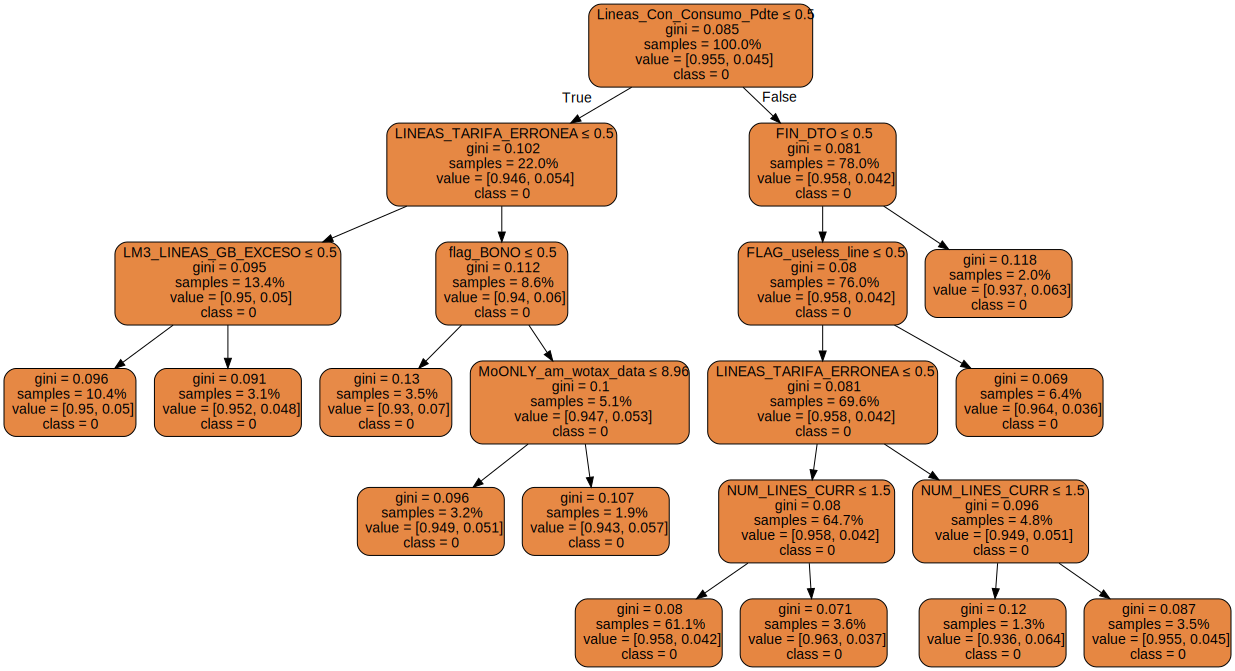

In [27]:
graph = graphviz.Source(dot_data)  
# #Para exportarlo a pdf graph.render("Arbol")
graph

In [79]:
# dot_data = tree.export_graphviz(clf, out_file = None,
#                                 feature_names = X_train.columns,
#                                 class_names = np.unique(Y_train),
#                                 filled=True,  rounded=True,  
#                          special_characters=True)

# pydot_graph = pydotplus.graph_from_dot_data(dot_data)
# # pydot_graph.write_png('original_tree.png')
# pydot_graph.set_size('"8,8!"')
# pydot_graph.write_png('SEG_WRONG_TARF_OPCION_1.png')

In [44]:
# primeras deduccion de reglas

verificar("flag")   

['flag_BONO', 'FLAG_useless_line', 'FLAG_NEW_SELL']

In [45]:
# regla 1 (lineas con tarfica erronea)
# ==============================================
Lineas_Con_Consumo_Pdte=1 and FIN_DTO =0 and LINEAS_TARIFA_ERRONEA > 1 # lineas sin uso 
# regla 2 (lineas con tarfica erronea)
# ==============================================
| Lineas_Con_Consumo_Pdte=1 and FIN_DTO =1 |
# regla 3 (lineas con tarfica erronea)
# ==============================================
Lineas_Con_Consumo_Pdte=1  and LINEAS_TARIFA_ERRONEA > 1 and flag_BONO =1




SyntaxError: invalid syntax (<ipython-input-45-f004084b4b53>, line 6)

#### Opciones 1.2

In [60]:
X=df[['Lineas_Con_Bono_Sin_Uso',
       'Fact_BONO',
 'Fact_BONO_discount', 
  'Lineas_Con_Bono_Sin_Uso',
 'LINEAS_TARIFA_ERRONEA',
 'flag_BONO',
 'Lineas_Con_Bono_Sin_Uso',
 'lineas_BONO_PAGADO',
 'Fact_BONO',
#  'NUM_SEGM_RESI_POST_CURR',
#  'NUM_TECH_SPEE_UNKN_POST_CURR',
#  'NUM_TECH_MOBI_POST_CURR',
#  'NUM_LINES_POST_CURR',
#  'NUM_TECH_SPEE_MOBI_POST_CURR',
#  'NUM_SERV_POST_CURR',
 'Lineas_Con_Consumo_Pdte',
#  'NUM_TECH_MOBI_CURR',
#  'NUM_BRAND_YOIGO_CURR',
#  'NUM_TECH_SPEE_MOBI_CURR',
#  'NUM_SERV_CURR',
  'NUM_LINES_CURR',
#  'NUM_TECH_SPEE_UNKN_CURR',
#  'NUM_SEGM_RESI_CURR',
 'FLAG_useless_line',
 'MoONLY_am_wotax_data',
 'total_amount_wo_tax_data',
# 'LM3_LINEAS_GB_EXCESO',
  'FIN_DTO',
 'NUM_LLAMADAS_WRONG_TARIFF'
]]

Y=df[['fuga_real']].astype(str)

In [61]:
# Realizamos el train test split
# ======================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

n = len(X)
print("Total de registros en el DF original: {}".format(n))
print("Porcentaje en  train respecto al original: {}".format(1.0 * len(X_train) / n))
print("Porcentaje en  test respecto al original: {}".format(1.0 * len(X_test) / n))

Total de registros en el DF original: 191059
Porcentaje en  train respecto al original: 0.7999989532029373
Porcentaje en  test respecto al original: 0.20000104679706268


In [62]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [63]:
# Indice de gini para arbol de decisión
# ======================================================
clf_gini = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=2000) 

#clf=clf_entropy.fit(X_train, Y_train)
clf=clf_gini.fit(X_train, Y_train)

In [64]:
np.unique(Y_train) # valores target deben de ser tipo caracter

array(['0', '1'], dtype=object)

In [65]:
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,  proportion = True,
                         special_characters=True)

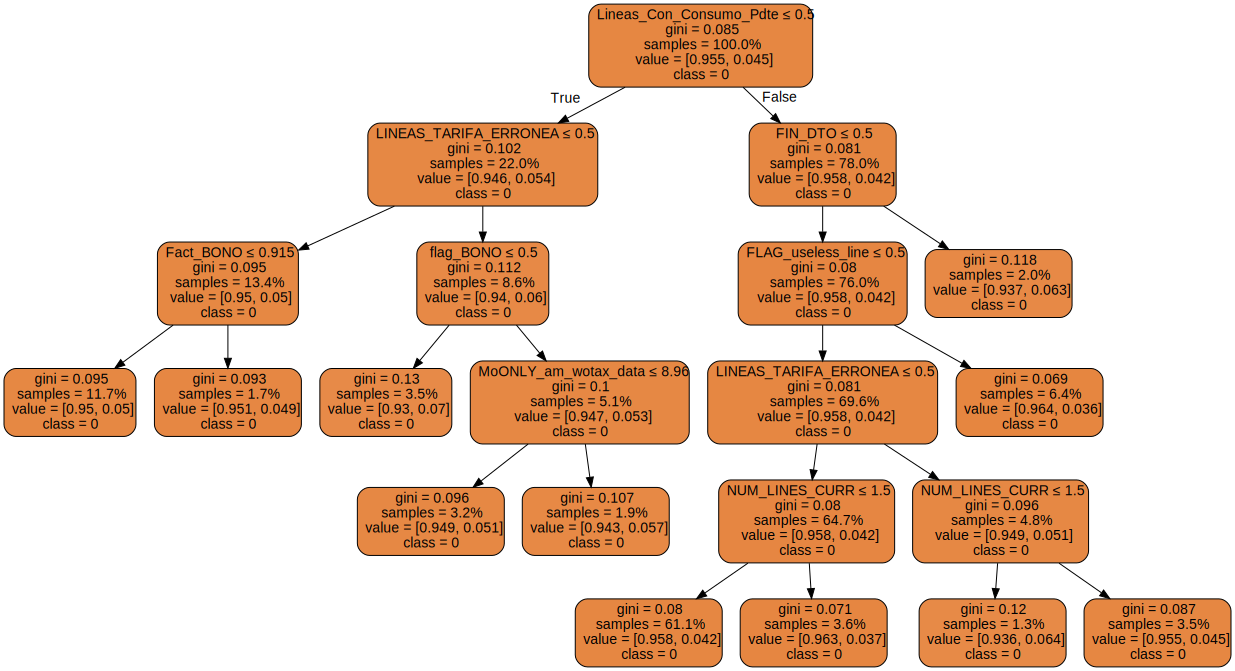

In [68]:
graph = graphviz.Source(dot_data)  
# #Para exportarlo a pdf graph.render("Arbol")
graph

In [ ]:
# # regla 1 (lineas con tarfica erronea)
# # ==============================================
# Lineas_Con_Consumo_Pdte=1 and FIN_DTO =0 and LINEAS_TARIFA_ERRONEA > 1 # lineas sin uso 
# # regla 2 (lineas con tarfica erronea)
# # ==============================================
# | Lineas_Con_Consumo_Pdte=1 and FIN_DTO =1 |
# # regla 3 (lineas con tarfica erronea)
# # ==============================================
# Lineas_Con_Consumo_Pdte=1  and LINEAS_TARIFA_ERRONEA > 1 and flag_BONO =1


# # Sección reglas 2
# # ==========================
# # telefono sin consumo

# Lineas_Con_Consumo_Pdte =1 and FIN_DTO=1 and FLAG_useless_line=1 |
# Lineas_Con_Consumo_Pdte =1 and FIN_DTO=1 and FLAG_useless_line=0 and LINEAS_TARIFA_ERRONEA |
# Lineas_Con_Consumo_Pdte = 0 and  LINEAS_TARIFA_ERRONEA >=1 and flag_BONO >=1 and MoONLY_am_wotax_data > 9

In [ ]:
#### aplicacion de reglas

In [83]:
conditions = [(df['Lineas_Con_Consumo_Pdte'] == 1 ) & (df['FIN_DTO']  == 0 ) & (df['LINEAS_TARIFA_ERRONEA'] > 1) | 
              (df['Lineas_Con_Consumo_Pdte'] == 1 ) & (df['LINEAS_TARIFA_ERRONEA'] > 1  ) & (df['flag_BONO']  == 1 )   |
              
              (df['Lineas_Con_Consumo_Pdte'] == 1 ) & (df['FIN_DTO'] == 1  ) & (df['FLAG_useless_line']  == 1 )   |
              (df['Lineas_Con_Consumo_Pdte'] == 1 ) & (df['FIN_DTO'] == 1  ) & (df['FLAG_useless_line']  == 0 )   &  (df['LINEAS_TARIFA_ERRONEA'] ==1) |
              
              (df['Lineas_Con_Consumo_Pdte'] == 0 ) & (df['LINEAS_TARIFA_ERRONEA'] > 1  ) & (df['flag_BONO']  >= 1 )  & 
              (df['MoONLY_am_wotax_data'] > 9)
                           
             ]
# valores
values = [1]
               
# aplicaciones
df['SEGMENTO_Wrong_Tariff'] = np.select(conditions, values)
df

YEAR  MONTH     EOP BRAND_DS  CUSTOMER_ID MIN_SERV_ACTIVATION_DATE  \
0      2020      6  202006    YOIGO       193452               2007-09-19   
1      2020      6  202006    YOIGO      1919926               2010-05-03   
2      2020      6  202006    YOIGO       177447               2007-08-22   
3      2020      6  202006    YOIGO      2057570               2010-06-30   
4      2020      6  202006    YOIGO      1142335               2009-05-26   
...     ...    ...     ...      ...          ...                      ...   
63590  2020      6  202006    YOIGO      1897838               2010-05-04   
63591  2020      6  202006    YOIGO      5481560               2013-09-03   
63592  2020      6  202006    YOIGO       456353               2008-04-24   
63593  2020      6  202006    YOIGO      7713262               2017-02-01   
63594  2020      6  202006    YOIGO      2332109               2010-09-20   

      MAX_SERV_DEACTIVATION_DATE  NUM_ACCS_TOTA  NUM_ACCS_ACTI  NUM_ACCS_DEAC  \
0                     2020-03-18              8              0              0   
1                     2020-02-20              6              0              0   
2                     2013-03-22             10              1              0   
3                     2018-12-05             10              0              0   
4                     2015-09-28              7              0              0   
...                          ...            ...            ...            ...   
63590                 2011-02-16              2              1              1   
63591                 2015-09-24              2              1              1   
63592                 2020-03-30              5              1              0   
63593                          .              1              1              1   
63594                 2020-06-13              6              1              1   

       ...   GB_EXCESO  Lineas_Exceso  Lineas_Poco_Uso  total_telefonos  \
0      ...  -10.159608            0.0              1.0              0.0   
1      ...    0.277075            1.0              0.0              3.0   
2      ...    0.000000            0.0              0.0              0.0   
3      ...    0.000000            0.0              0.0              0.0   
4      ...    0.000000            0.0              0.0              0.0   
...    ...         ...            ...              ...              ...   
63590  ... -981.843450            0.0              0.0              2.0   
63591  ... -985.184686            0.0              0.0              1.0   
63592  ... -974.953836            0.0              0.0              2.0   
63593  ... -992.268617            0.0              0.0              1.0   
63594  ... -969.977248            0.0              0.0              1.0   

       DISCOUNT_VALUE_eur  FIN_DTO  LINEAS_TARIFA_ERRONEA  \
0                    0.00      0.0                      0   
1                   61.51      2.0                      1   
2                    0.00      0.0                      0   
3                    0.00      0.0                      0   
4                    0.00      0.0                      0   
...                   ...      ...                    ...   
63590               37.95      0.0                      0   
63591               17.95      1.0                      0   
63592               53.85      1.0                      0   
63593               17.95      1.0                      1   
63594               35.90      0.0                      1   

       SEGMENTO_Wrong_Tariff  SEGMENTO_competitors  SEGMENTO_ISSUE  
0                          0                     0               0  
1                          0                     0               0  
2                          0                     0               0  
3                          0                     0               0  
4                          0                     0               0  
...                      ...                   ...           

In [84]:
conditions = [(df['IS_ACCO_BUND_LONGER_THAN_1_YEAR'] == 0 ) & (df['MIN_LLAMADAS_COMPETENCIA_OUT'] > 2 )  | 
              (df['IS_ACCO_BUND_LONGER_THAN_1_YEAR'] == 0 ) & (df['MIN_LLAMADAS_COMPETENCIA_OUT'] < 1 ) & (df['FRIENDS_IS_CHURN_YOI'] ==1 ) | 
              (df['IS_ACCO_BUND_LONGER_THAN_1_YEAR'] == 0 ) & (df['MIN_LLAMADAS_COMPETENCIA_OUT'] < 1 ) & (df['FRIENDS_IS_CHURN_YOI'] ==0) & (df['MOSAIC_NUM_COMM_DEPT_ATC_CURR']==1)
             ]
 

# valores
values = [1]
               
# aplicaciones
df['SEGMENTO_competitors'] = np.select(conditions, values)
df



    

YEAR  MONTH     EOP BRAND_DS  CUSTOMER_ID MIN_SERV_ACTIVATION_DATE  \
0      2020      6  202006    YOIGO       193452               2007-09-19   
1      2020      6  202006    YOIGO      1919926               2010-05-03   
2      2020      6  202006    YOIGO       177447               2007-08-22   
3      2020      6  202006    YOIGO      2057570               2010-06-30   
4      2020      6  202006    YOIGO      1142335               2009-05-26   
...     ...    ...     ...      ...          ...                      ...   
63590  2020      6  202006    YOIGO      1897838               2010-05-04   
63591  2020      6  202006    YOIGO      5481560               2013-09-03   
63592  2020      6  202006    YOIGO       456353               2008-04-24   
63593  2020      6  202006    YOIGO      7713262               2017-02-01   
63594  2020      6  202006    YOIGO      2332109               2010-09-20   

      MAX_SERV_DEACTIVATION_DATE  NUM_ACCS_TOTA  NUM_ACCS_ACTI  NUM_ACCS_DEAC  \
0                     2020-03-18              8              0              0   
1                     2020-02-20              6              0              0   
2                     2013-03-22             10              1              0   
3                     2018-12-05             10              0              0   
4                     2015-09-28              7              0              0   
...                          ...            ...            ...            ...   
63590                 2011-02-16              2              1              1   
63591                 2015-09-24              2              1              1   
63592                 2020-03-30              5              1              0   
63593                          .              1              1              1   
63594                 2020-06-13              6              1              1   

       ...   GB_EXCESO  Lineas_Exceso  Lineas_Poco_Uso  total_telefonos  \
0      ...  -10.159608            0.0              1.0              0.0   
1      ...    0.277075            1.0              0.0              3.0   
2      ...    0.000000            0.0              0.0              0.0   
3      ...    0.000000            0.0              0.0              0.0   
4      ...    0.000000            0.0              0.0              0.0   
...    ...         ...            ...              ...              ...   
63590  ... -981.843450            0.0              0.0              2.0   
63591  ... -985.184686            0.0              0.0              1.0   
63592  ... -974.953836            0.0              0.0              2.0   
63593  ... -992.268617            0.0              0.0              1.0   
63594  ... -969.977248            0.0              0.0              1.0   

       DISCOUNT_VALUE_eur  FIN_DTO  LINEAS_TARIFA_ERRONEA  \
0                    0.00      0.0                      0   
1                   61.51      2.0                      1   
2                    0.00      0.0                      0   
3                    0.00      0.0                      0   
4                    0.00      0.0                      0   
...                   ...      ...                    ...   
63590               37.95      0.0                      0   
63591               17.95      1.0                      0   
63592               53.85      1.0                      0   
63593               17.95      1.0                      1   
63594               35.90      0.0                      1   

       SEGMENTO_Wrong_Tariff  SEGMENTO_competitors  SEGMENTO_ISSUE  
0                          0                     0               0  
1                          0                     0               0  
2                          0                     0               0  
3                          0                     0               0  
4                          0                     0               0  
...                      ...                   ...           

In [85]:
conditions = [(df['NUM_LLAMADAS_PROCESS'] >  0 ) & 
              (df['MOSAIC_NUM_COMM_DEPT_ATC_CURR'] <= 1.5 ) ]
 

# valores
values = [1]
               
# aplicaciones
df['SEGMENTO_ISSUE'] = np.select(conditions, values)
df



YEAR  MONTH     EOP BRAND_DS  CUSTOMER_ID MIN_SERV_ACTIVATION_DATE  \
0      2020      6  202006    YOIGO       193452               2007-09-19   
1      2020      6  202006    YOIGO      1919926               2010-05-03   
2      2020      6  202006    YOIGO       177447               2007-08-22   
3      2020      6  202006    YOIGO      2057570               2010-06-30   
4      2020      6  202006    YOIGO      1142335               2009-05-26   
...     ...    ...     ...      ...          ...                      ...   
63590  2020      6  202006    YOIGO      1897838               2010-05-04   
63591  2020      6  202006    YOIGO      5481560               2013-09-03   
63592  2020      6  202006    YOIGO       456353               2008-04-24   
63593  2020      6  202006    YOIGO      7713262               2017-02-01   
63594  2020      6  202006    YOIGO      2332109               2010-09-20   

      MAX_SERV_DEACTIVATION_DATE  NUM_ACCS_TOTA  NUM_ACCS_ACTI  NUM_ACCS_DEAC  \
0                     2020-03-18              8              0              0   
1                     2020-02-20              6              0              0   
2                     2013-03-22             10              1              0   
3                     2018-12-05             10              0              0   
4                     2015-09-28              7              0              0   
...                          ...            ...            ...            ...   
63590                 2011-02-16              2              1              1   
63591                 2015-09-24              2              1              1   
63592                 2020-03-30              5              1              0   
63593                          .              1              1              1   
63594                 2020-06-13              6              1              1   

       ...   GB_EXCESO  Lineas_Exceso  Lineas_Poco_Uso  total_telefonos  \
0      ...  -10.159608            0.0              1.0              0.0   
1      ...    0.277075            1.0              0.0              3.0   
2      ...    0.000000            0.0              0.0              0.0   
3      ...    0.000000            0.0              0.0              0.0   
4      ...    0.000000            0.0              0.0              0.0   
...    ...         ...            ...              ...              ...   
63590  ... -981.843450            0.0              0.0              2.0   
63591  ... -985.184686            0.0              0.0              1.0   
63592  ... -974.953836            0.0              0.0              2.0   
63593  ... -992.268617            0.0              0.0              1.0   
63594  ... -969.977248            0.0              0.0              1.0   

       DISCOUNT_VALUE_eur  FIN_DTO  LINEAS_TARIFA_ERRONEA  \
0                    0.00      0.0                      0   
1                   61.51      2.0                      1   
2                    0.00      0.0                      0   
3                    0.00      0.0                      0   
4                    0.00      0.0                      0   
...                   ...      ...                    ...   
63590               37.95      0.0                      0   
63591               17.95      1.0                      0   
63592               53.85      1.0                      0   
63593               17.95      1.0                      1   
63594               35.90      0.0                      1   

       SEGMENTO_Wrong_Tariff  SEGMENTO_competitors  SEGMENTO_ISSUE  
0                          0                     0               0  
1                          0                     0               0  
2                          0                     0               0  
3                          0                     0               0  
4                          0                     0               0  
...                      ...                   ...           

In [86]:
verificar('low') 

['NUM_LLAMADAS_LOWI_OUT',
 'MIN_LLAMADAS_LOWI_OUT',
 'MIN_LLAMADAS_LOWI_IN',
 'NUM_LLAMADAS_LOWI_IN']

In [88]:
# Generacion de  PROBLEMAS_TECNICOS
# ==============================================================
# condiciones
conditions = [#(df['NUM_LINE_KPI_QOE_MOBI'] > 1) |
              (df['NUM_LINE_THR_QOE_MOBI'] > 1) |
              (df['MOBILE_INCIDENCES'] > 1) |              
              (df['AVG_THR_QOE_MOBI']<=0.5) |  
              (df['AVG_DL_PEAK_THR_KBPS_MOBI']<=1381.39 ) |
              (df['AVG_KPI_PERC_CSS_MOBI']<=54.23) 
             ]

# valores
values = [1]
               
# aplicaciones
df['PROBLEMAS_TECNICOS'] = np.select(conditions, values)



# Generacion de  TICKETS_RED
# ==============================================================
# condiciones
conditions = [(df['TICKETS_NETWORK'] >= 2  )  | 
              (df['Mobile_Red_Incidences'] >=1)]

# valores
values = [1]
               
# aplicaciones
df['TICKETS_RED'] = np.select(conditions, values)
    
    
    
# Generacion de  low_signal
# ==============================================================
# condiciones
conditions = [(df['NUM_THR_QOE_MOBI_1'] == 1 ) | 
              (df['NUM_THR_QOE_MOBI_2'] == 1 ) | 
              (df['IS_DETERIORED_3M_AVG_KPI_QOE_MOBI']==1) |            
              (df['DELTA_MOBILE_INCIDENCES_3M_MONTH']==1) ]


# valores
values = [1]
               
# aplicaciones
df['low_signal'] = np.select(conditions, values)

In [89]:
conditions = [(df['AVG_THR_QOE_MOBI'] >=  1.5 ) &  (df['low_signal'] == 1 )  & 
              (df['NUM_THR_QOE_MOBI_2'] == 0 ) &  (df['IS_DETERIORED_1M_AVG_THR_QOE_MOBI'] >= 1 )
              |
              
              (df['AVG_THR_QOE_MOBI'] >=  1.5 ) &  (df['low_signal'] == 1 )  & 
              (df['NUM_THR_QOE_MOBI_2'] >= 1 ) &   (df['NUM_MONTH_BAD_THR_QOE_MOBI_3M'] >= 1  )             
             
             ]  
              
              
               

# valores
values = [1]
               
# aplicaciones
df['SEGMENTO_calidad'] = np.select(conditions, values)
df




YEAR  MONTH     EOP BRAND_DS  CUSTOMER_ID MIN_SERV_ACTIVATION_DATE  \
0      2020      6  202006    YOIGO       193452               2007-09-19   
1      2020      6  202006    YOIGO      1919926               2010-05-03   
2      2020      6  202006    YOIGO       177447               2007-08-22   
3      2020      6  202006    YOIGO      2057570               2010-06-30   
4      2020      6  202006    YOIGO      1142335               2009-05-26   
...     ...    ...     ...      ...          ...                      ...   
63590  2020      6  202006    YOIGO      1897838               2010-05-04   
63591  2020      6  202006    YOIGO      5481560               2013-09-03   
63592  2020      6  202006    YOIGO       456353               2008-04-24   
63593  2020      6  202006    YOIGO      7713262               2017-02-01   
63594  2020      6  202006    YOIGO      2332109               2010-09-20   

      MAX_SERV_DEACTIVATION_DATE  NUM_ACCS_TOTA  NUM_ACCS_ACTI  NUM_ACCS_DEAC  \
0                     2020-03-18              8              0              0   
1                     2020-02-20              6              0              0   
2                     2013-03-22             10              1              0   
3                     2018-12-05             10              0              0   
4                     2015-09-28              7              0              0   
...                          ...            ...            ...            ...   
63590                 2011-02-16              2              1              1   
63591                 2015-09-24              2              1              1   
63592                 2020-03-30              5              1              0   
63593                          .              1              1              1   
63594                 2020-06-13              6              1              1   

       ...  DISCOUNT_VALUE_eur  FIN_DTO  LINEAS_TARIFA_ERRONEA  \
0      ...                0.00      0.0                      0   
1      ...               61.51      2.0                      1   
2      ...                0.00      0.0                      0   
3      ...                0.00      0.0                      0   
4      ...                0.00      0.0                      0   
...    ...                 ...      ...                    ...   
63590  ...               37.95      0.0                      0   
63591  ...               17.95      1.0                      0   
63592  ...               53.85      1.0                      0   
63593  ...               17.95      1.0                      1   
63594  ...               35.90      0.0                      1   

       SEGMENTO_Wrong_Tariff  SEGMENTO_competitors  SEGMENTO_ISSUE  \
0                          0                     0               0   
1                          0                     0               0   
2                          0                     0               0   
3                          0                     0               0   
4                          0                     0               0   
...                      ...                   ...             ...   
63590                      0                     0               0   
63591                      0                     0               0   
63592                      0                     0               0   
63593                      1                     0               0   
63594                      0                     0               0   

       PROBLEMAS_TECNICOS  TICKETS_RED  low_signal  SEGMENTO_calidad  
0                       0            0           1                 1  
1                       0            0           0                 0  
2                       0            0           0                 0  
3                       0            0           0                 0  
4                       0            0           0                 0  
...                   ...          ...         ..

In [90]:
conditions = [(df['SEGMENTO_Wrong_Tariff'] == 1 ) , 
                  (df['SEGMENTO_competitors'] == 1 ) , 
                  (df['SEGMENTO_ISSUE'] == 1 ) , 
                  (df['SEGMENTO_calidad'] == 1 ) , 
             
             ]  
              
        
        
               

# valores
values = ['SEG.Wrong_Tariff','SEGMENTO_competitors','SEGMENTO_ISSUE','SEGMENTO_calidadv' ]
               
# aplicaciones
df['SEGMENTO_FUGA-1P'] = np.select(conditions, values)
df

YEAR  MONTH     EOP BRAND_DS  CUSTOMER_ID MIN_SERV_ACTIVATION_DATE  \
0      2020      6  202006    YOIGO       193452               2007-09-19   
1      2020      6  202006    YOIGO      1919926               2010-05-03   
2      2020      6  202006    YOIGO       177447               2007-08-22   
3      2020      6  202006    YOIGO      2057570               2010-06-30   
4      2020      6  202006    YOIGO      1142335               2009-05-26   
...     ...    ...     ...      ...          ...                      ...   
63590  2020      6  202006    YOIGO      1897838               2010-05-04   
63591  2020      6  202006    YOIGO      5481560               2013-09-03   
63592  2020      6  202006    YOIGO       456353               2008-04-24   
63593  2020      6  202006    YOIGO      7713262               2017-02-01   
63594  2020      6  202006    YOIGO      2332109               2010-09-20   

      MAX_SERV_DEACTIVATION_DATE  NUM_ACCS_TOTA  NUM_ACCS_ACTI  NUM_ACCS_DEAC  \
0                     2020-03-18              8              0              0   
1                     2020-02-20              6              0              0   
2                     2013-03-22             10              1              0   
3                     2018-12-05             10              0              0   
4                     2015-09-28              7              0              0   
...                          ...            ...            ...            ...   
63590                 2011-02-16              2              1              1   
63591                 2015-09-24              2              1              1   
63592                 2020-03-30              5              1              0   
63593                          .              1              1              1   
63594                 2020-06-13              6              1              1   

       ...  FIN_DTO  LINEAS_TARIFA_ERRONEA  SEGMENTO_Wrong_Tariff  \
0      ...      0.0                      0                      0   
1      ...      2.0                      1                      0   
2      ...      0.0                      0                      0   
3      ...      0.0                      0                      0   
4      ...      0.0                      0                      0   
...    ...      ...                    ...                    ...   
63590  ...      0.0                      0                      0   
63591  ...      1.0                      0                      0   
63592  ...      1.0                      0                      0   
63593  ...      1.0                      1                      1   
63594  ...      0.0                      1                      0   

       SEGMENTO_competitors  SEGMENTO_ISSUE  PROBLEMAS_TECNICOS  TICKETS_RED  \
0                         0               0                   0            0   
1                         0               0                   0            0   
2                         0               0                   0            0   
3                         0               0                   0            0   
4                         0               0                   0            0   
...                     ...             ...                 ...          ...   
63590                     0               0                   0            0   
63591                     0               0                   0            0   
63592                     0               0                   0            0   
63593                     0               0                   0            0   
63594                     0               0                   0            0   

       low_signal  SEGMENTO_calidad   SEGMENTO_FUGA-1P  
0               1                 1  SEGMENTO_calidadv  
1               0                 0                  0  
2               0                 0                  0  
3               0                 0                  0  
4               0                 

# subir a bq

In [256]:
conexion_bq.upload_table_bq_gcs(df,
                    'bi-data-science-pilots.DESARROLLO.00segment_cortes2', 
                    bucket_gcs = 'nbamasmovil',
                    archivo_gcs = 'a.csv',
                    archivo_local_tmp = 'a.csv',
                    sobreescribo = True,
                    elimino_fichero_gcs = True)

Starting job b943d874-53f0-474f-85e8-7c9d64fb0b4b
Job finished.
Errors
None
Loaded 3001 rows.


In [257]:
conexion_bq.check_if_table_exists('bi-data-science-pilots.DESARROLLO.00segment_cortes')

True